In [4]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Porównanie metod

In [5]:
def read_all_files(path):
    all_files = glob.glob(os.path.join('.', path + "/*.txt"))
    li = []

    for filename in all_files:
        print(filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    return li

In [6]:
li = read_all_files("data/2blue-vs-1red")
frame = pd.concat(li, axis=0, ignore_index=True)
frame

.\data/2blue-vs-1red\ModelOutput.2019.lis.17.20_35_48.txt
.\data/2blue-vs-1red\ModelOutput.2019.lis.17.20_36_04.txt
.\data/2blue-vs-1red\ModelOutput.2019.lis.17.20_36_12.txt
.\data/2blue-vs-1red\ModelOutput.2019.lis.17.20_36_20.txt
.\data/2blue-vs-1red\ModelOutput.2019.lis.17.20_36_25.txt


,tick,run,remainingTanksBlue,remainingTanksRed,remainingRidersBlue,remainingRidersRed,remainingSoldiersBlue,remainingSoldiersRed
0,1.0,1,10.0,10.0,10.0,10.0,10.0,10.0
1,2.0,1,10.0,10.0,10.0,10.0,10.0,10.0
2,3.0,1,10.0,10.0,10.0,10.0,10.0,10.0
3,4.0,1,10.0,10.0,10.0,10.0,10.0,10.0
4,5.0,1,10.0,10.0,9.0,10.0,10.0,9.0
5,6.0,1,10.0,10.0,8.0,10.0,10.0,8.0
6,7.0,1,9.0,9.0,8.0,10.0,10.0,7.0
7,8.0,1,9.0,9.0,7.0,9.0,10.0,7.0
8,9.0,1,9.0,9.0,7.0,8.0,10.0,7.0
9,10.0,1,9.0,9.0,7.0,8.0,9.0,6.0


## Porównanie liczności agentów różnego typu

In [7]:
def read_one_file(path):
    return pd.read_csv(os.path.join('.', path), index_col=None, header=0)

In [8]:
mapping = read_one_file("data/0/ModelOutput.2019.lis.17.20_08_16.batch_param_map.txt")
mapping

data = read_one_file("data/0/ModelOutput.2019.lis.17.20_08_16.txt")
data

,tick,run,remainingTanksBlue,remainingTanksRed,remainingRidersBlue,remainingRidersRed,remainingSoldiersBlue,remainingSoldiersRed
0,1.0,1,10.0,10.0,10.0,10.0,10.0,10.0
1,2.0,1,10.0,10.0,10.0,10.0,10.0,10.0
2,3.0,1,10.0,10.0,9.0,10.0,10.0,10.0
3,4.0,1,10.0,9.0,9.0,10.0,10.0,10.0
4,5.0,1,10.0,9.0,8.0,9.0,10.0,10.0
5,6.0,1,10.0,9.0,8.0,9.0,10.0,10.0
6,7.0,1,10.0,9.0,8.0,9.0,10.0,10.0
7,8.0,1,10.0,9.0,8.0,9.0,10.0,9.0
8,9.0,1,8.0,9.0,8.0,9.0,10.0,9.0
9,10.0,1,8.0,9.0,8.0,8.0,10.0,9.0


In [9]:
def get_specific_states(data, first=True): #if not first is last state
    if first:
        ticks = data.groupby("run")['tick'].min().values
    else:
        ticks = data.groupby("run")['tick'].max().values
    states = list()
    for i, tick in enumerate(ticks):
        row = data.loc[(data['run'] == i + 1) & (data['tick'] == tick)]
        states.append(row.values[0])
    return pd.DataFrame(data=states, columns=data.columns)

In [18]:
def determine_winner(remainingBlue, remainingRed):
    if remainingBlue > remainingRed:
        return "Blue"
    elif remainingRed > remainingBlue:
        return "Red"
    else:
        return "Draw"
    

def get_battle_summaries(first_states, last_states):
    battle_summaries = []        
    for i in range(len(last_states)):
        first_state, last_state = first_states.loc[i], last_states.loc[i]
        battle_summary = [
            last_state["tick"], #ticks
            first_state["remainingTanksBlue"], #initialTanksBlue
            first_state["remainingTanksRed"], #initialTanksRed
            first_state["remainingRidersBlue"], #initialRidersBlue
            first_state["remainingRidersRed"], #initialRidersRed
            first_state["remainingSoldiersBlue"], #initialSoldiersBlue
            first_state["remainingSoldiersRed"], #initialSoldiersRed
            last_state["remainingTanksBlue"], #remainingTanksBlue
            last_state["remainingTanksRed"], #remainingTanksRed
            last_state["remainingRidersBlue"], #remainingRidersBlue
            last_state["remainingRidersRed"], #remainingRidersRed
            last_state["remainingSoldiersBlue"], #remainingSoldiersBlue
            last_state["remainingSoldiersRed"], #remainingSoldiersRed
            last_state["remainingTanksBlue"] + last_state["remainingRidersBlue"] + last_state["remainingSoldiersBlue"], # remainingBlue
            last_state["remainingTanksRed"] + last_state["remainingRidersRed"] + last_state["remainingSoldiersRed"], # remainingRed
        ]
        battle_summary.append(determine_winner(battle_summary[-2], battle_summary[-1])) #winner
        battle_summaries.append(battle_summary)

    return pd.DataFrame(data=battle_summaries, columns=[
        "ticks",
        "initialTanksBlue",
        "initialTanksRed",
        "initialRidersBlue",
        "initialRidersRed",
        "initialSoldiersBlue",
        "initialSoldiersRed",
        "remainingTanksBlue",
        "remainingTanksRed",
        "remainingRidersBlue",
        "remainingRidersRed",
        "remainingSoldiersBlue",
        "remainingSoldiersRed",
        "remainingBlue",
        "remainingRed",
        "winner"
    ]) 

In [20]:
last_states = get_specific_states(data, False)
first_states = get_specific_states(data, True)
battle_summaries = get_battle_summaries(first_states, last_states)

In [21]:
battle_summaries.head()

,ticks,initialTanksBlue,initialTanksRed,initialRidersBlue,initialRidersRed,initialSoldiersBlue,initialSoldiersRed,remainingTanksBlue,remainingTanksRed,remainingRidersBlue,remainingRidersRed,remainingSoldiersBlue,remainingSoldiersRed,remainingBlue,remainingRed,winner
0,389.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,Blue
1,585.0,10.0,10.0,10.0,10.0,10.0,10.0,3.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,Blue
2,304.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,Blue
3,1000.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Draw
4,904.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Red


Number of completed battles: 552, number of completed battles:  177.


Text(0.5, 1.0, 'Ilość wygranych przez daną drużynę')

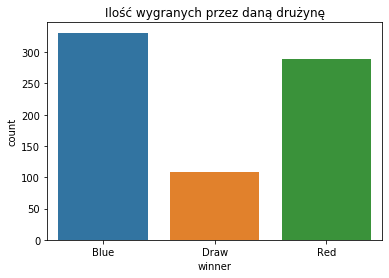

In [22]:
number_completed_battles = sum(last_states['tick'] < 1000)
number_incompleted_battles = len(last_states) - sum(last_states['tick'] < 1000)
print(f"Number of completed battles: {number_completed_battles}, number of completed battles:  {number_incompleted_battles}.")

sns.countplot(x="winner", data=battle_summaries).set_title("Ilość wygranych przez daną drużynę")

Text(0.5, 1.0, 'Rozkład ilości ruchów w danej walce')

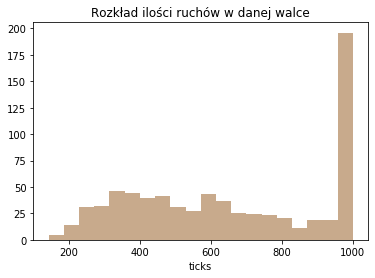

In [26]:
sns.distplot(battle_summaries['ticks'], kde=False, bins=20).set_title("Rozkład ilości ruchów w danej walce")

Text(0.5, 1.0, 'Rozkład ilości ruchów w danej walce pod odcięciu 1000 ruchów')

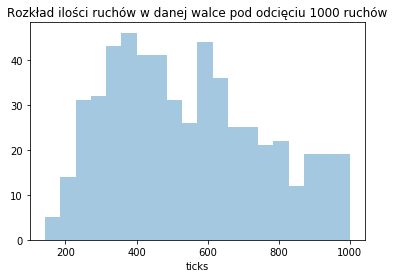

In [31]:
sns.distplot(battle_summaries[battle_summaries['ticks'] < 1000]['ticks'], kde=False, bins=20).set_title("Rozkład ilości ruchów w danej walce pod odcięciu 1000 ruchów")